# RNN Training

In [ ]:
from sklearn import metrics
from numpy import loadtxt
import pandas as pd
import numpy as np
import pylab as plt
import tensorflow as tf
from numpy import savetxt
from tensorflow.python.framework import ops
print(tf.__version__)

#Visualization Libraries
import seaborn as sns

# Size of matplotlib histogram bins
bin_size = 20

# load array
train = loadtxt('train.csv', delimiter=',')
test = loadtxt('test.csv', delimiter=',')

# Split array
train_x = train[:,:11]
test_x = test[:,:11]
train_y = train[:,11]
test_y = test[:,11]

In [12]:
# Check the new distribution in the training and testing sets
unique, counts = np.unique(train_y, return_counts=True)
dict(zip(unique, counts))

{0.0: 281967, 1.0: 141064}

In [13]:
unique, counts = np.unique(test_y, return_counts=True)
dict(zip(unique, counts))

{0.0: 70559, 1.0: 35199}

# Recurrent Neural Network

In [14]:
# importing libraries
from keras import optimizers, losses, activations, models
from keras.callbacks import ModelCheckpoint, EarlyStopping, LearningRateScheduler, ReduceLROnPlateau
from keras.layers import Layer, GRU, LSTM, Dense, Input, Dropout, Convolution1D, MaxPool1D, GlobalMaxPool1D, GlobalAveragePooling1D, \
    concatenate
from keras.layers import LeakyReLU
from keras import regularizers, backend, initializers
from keras.models import Sequential
from keras.utils import to_categorical
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score
from sklearn import preprocessing
from keras.initializers import Ones, Zeros
import keras.backend as K
import time
import gc

start = time.clock() 

class LayerNormalization(Layer):
    def __init__(self, eps=1e-6, **kwargs):
        self.eps = eps
        super(LayerNormalization, self).__init__(**kwargs)
    def build(self, input_shape):
        self.gamma = self.add_weight(name='gamma', shape=input_shape[-1:],
                                     initializer=Ones(), trainable=True)
        self.beta = self.add_weight(name='beta', shape=input_shape[-1:],
                                    initializer=Zeros(), trainable=True)
        super(LayerNormalization, self).build(input_shape)
    def call(self, x):
        mean = K.mean(x, axis=-1, keepdims=True)
        std = K.std(x, axis=-1, keepdims=True)
        return self.gamma * (x - mean) / (std + self.eps) + self.beta
    def compute_output_shape(self, input_shape):
        return input_shape

layer_size1 = 12
layer_size2 = 10
layer_size3 = 7
layer_size4 = 5
layer_size5 = 4
layer_size6 = 3
timesteps = 1 # static data
data_dim = 11

X_train = np.reshape(train_x, (train_x.shape[0], 1, train_x.shape[1]))
X_test = np.reshape(test_x, (test_x.shape[0], 1, test_x.shape[1]))
train_y = to_categorical(train_y)

#  use_bias=True, bias_initializer=initializers.Constant(-1)

model = Sequential()
model.add(GRU(layer_size1, return_sequences=True, input_shape=(timesteps, data_dim)))
model.add(LayerNormalization())
model.add(LeakyReLU(alpha=0.01))
model.add(GRU(layer_size2, return_sequences=True))
model.add(LayerNormalization())
model.add(LeakyReLU(alpha=0.01))
model.add(GRU(layer_size3, return_sequences=True))
model.add(LayerNormalization())
model.add(LeakyReLU(alpha=0.01))
model.add(GRU(layer_size4, return_sequences=True))
model.add(LayerNormalization())
model.add(LeakyReLU(alpha=0.01))
model.add(GRU(layer_size5, return_sequences=True))
model.add(LayerNormalization())
model.add(LeakyReLU(alpha=0.01))
model.add(GRU(layer_size6, return_sequences=False))
model.add(LayerNormalization())
model.add(LeakyReLU(alpha=0.01))
model.add(Dense(2, activation='softmax'))


opt = optimizers.Adam(0.001)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

# Stop the training when there is no improvement in the validation accuracy for ten consecutive epochs
early = EarlyStopping(monitor='val_accuracy', patience=10, verbose=1)

# reduces learning rate when a metric has stopped improving
redonplat = ReduceLROnPlateau(monitor="val_accuracy", mode="max", patience=7, verbose=0)

# defining the callbacks list to include the above parameters
callbacks_list = [early, redonplat]

# train the model
history = model.fit(X_train, train_y, epochs=1000, verbose=0, callbacks=callbacks_list, validation_split=0.1)
end = time.clock()
print("Time for training: {} ".format((end-start))) 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


Epoch 00046: early stopping
Time for training: 4402.126376 


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:87: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


In [15]:
# test the model
start = time.clock() 
pred_test = model.predict(X_test)
end = time.clock()
pred_test = np.argmax(pred_test, axis=-1)
print("Time for prediction: {} ".format((end-start))) 


# get f1 score of the model & print it. The f1 score considers the precision & recall
f1 = f1_score(test_y, pred_test, average="macro")
print("Test f1 score : %s "% f1)

# get ROC AUC score of the model & print it
roc = roc_auc_score(test_y, pred_test)
print("Test ROC AUC Score : %s "% roc)

# get the accuracy and print it
acc = accuracy_score(test_y, pred_test)
print("Test accuracy score : %s "% acc)

# Save the model
model.save("model21_5_1_final.h5")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  after removing the cwd from sys.path.


Time for prediction: 6.959705600000234 
Test f1 score : 0.8277284139665585 
Test ROC AUC Score : 0.8296578519509366 
Test accuracy score : 0.8461014769568259 


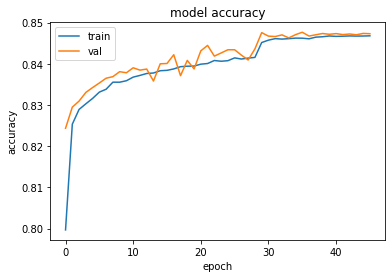

In [16]:
# Plot model accuracy evolution
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

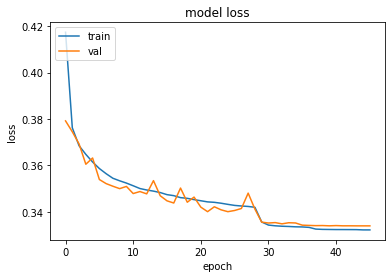

In [17]:
# Plot model loss evolution
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()